# Serie de tiempo (Airpassengers)
### Oscar Julian Layton

Las observaciones hacen referencia a los totales mensuales de pasajeros de aerolíneas internacionales entre 1949 y 1960, el modelo a realizar será usado para pronosticar estimaciones de 3 puntos para los totales mensuales de 1961.

* Ha de notarse que se realizará una descomposicion por medio de  **(promedios Móviles,  Suavizamiento Exponencial,  Diferenciación)**
* Se realizará un ajuste a la serie de datos AirPassengers por medio del modelo ARIMA estacional, así como su correspondiente análisis de residuales y pronósticos.

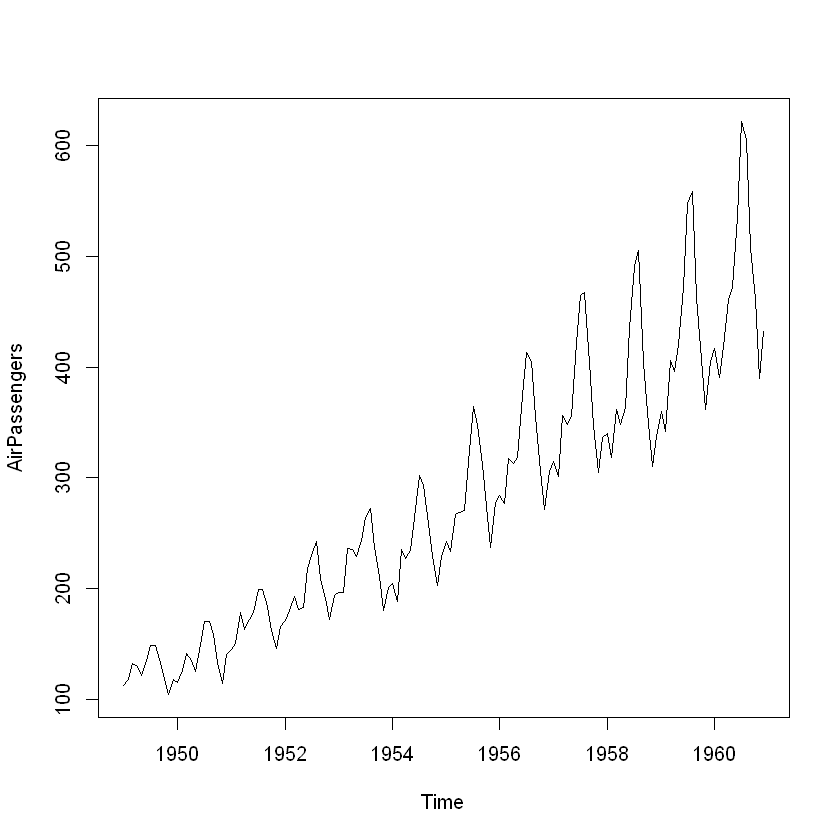

In [98]:
######Base de Pasajeros###
data("AirPassengers")
plot(AirPassengers)

El primer análisis que puede desarrollarse en la serie es netamente descriptivo, en este orden de ideas se puede obsrvar que la serie tiene un patron de aumento, asi mismo la serie no tiene una media constante al transcurrir los años "la media no es la misma a lo largo del tiempo", además se logra observar un aumento en la varianza. 

Podría decisrse que la serie no es estacionaria y se debe hacer un procedimiento de trasformación para volverla a estacionaria (promedios Móviles, Suavizamiento Exponencial, Diferenciación). En el siguiente month plot se puede identificar el comportamiento no estacionario.

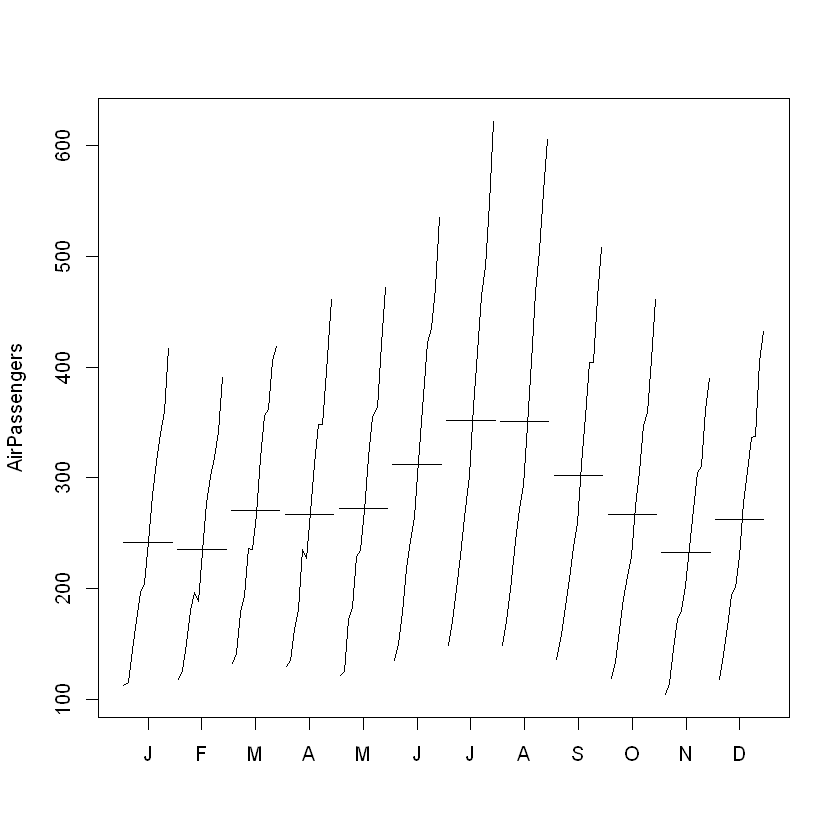

In [99]:
monthplot(AirPassengers)

### Estabilizar la varianza

Una alternativa para estabilizar la varianza de la serie, es el uso de la transformación Box - Cox, la cual se define como:

$$
f_x(U_t)=\left\{\begin{matrix}
 \displaystyle\frac{U_t^\lambda - 1}{\lambda} & \lambda>0\\ 
Ln (U_t) & \lambda=0
\end{matrix}\right.
$$

donde el valor de $\lambda$ es el valor objetivo, el cual es el que mejor se ajusta a los datos para lograr una mejor estabilización de la serie. Haciendo uso de la función $boxcox$ se obtiene dicho valor.

In [100]:
#####identificando lambda para hacer Transformación Box-Cox
library(forecast)
forecast::BoxCox.lambda(AirPassengers, method = "guerrero", lower = 0, upper = 2)    #genera ellambda, aqui es casi 0 

[1] 4.102259e-05

Luego se sugiere tomar $\lambda = 0.051$ para transformar la serie. A continuación se muestra una gráfica la cual indica el valor de lambda a usar.

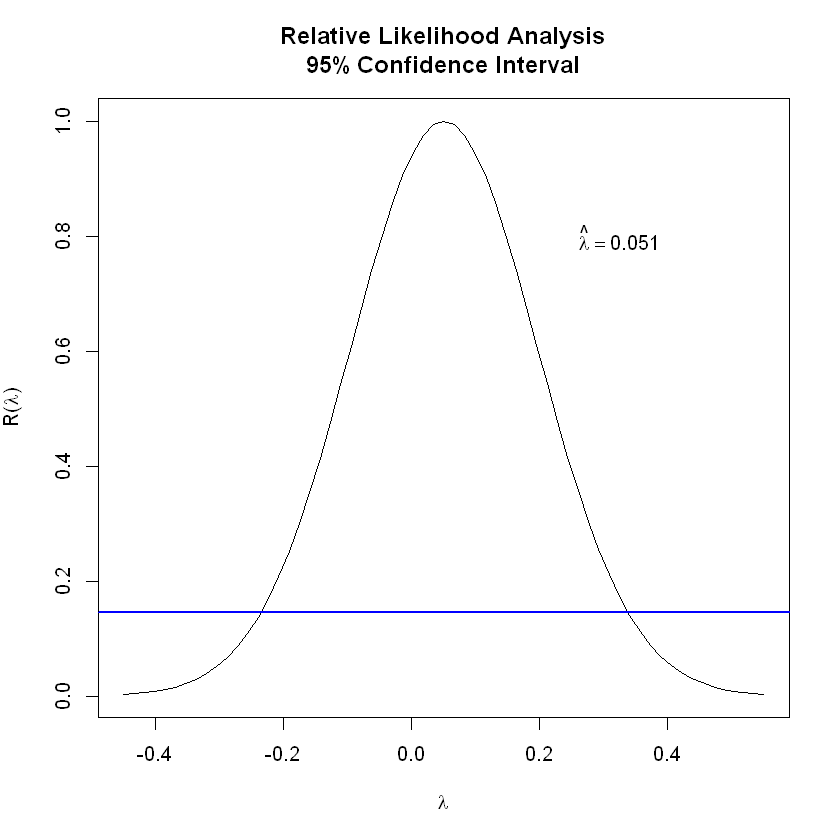

In [101]:
##method="loglik"
library(FitAR)
BoxCox(AirPassengers) #genera una grafica mostrando los posibles valores de lambda
FitAR::BoxCox(AirPassengers) #este genera una grafica con los valores posibles de lambda

 A continuación se muestra el gráfico de la serie transformada

In [102]:
#------------------
#realizando transformacion BoxCox
#------------------
lAirPass=log(AirPassengers)  #realizando la transformacion BoxCox a mano  ==BoxCox(AirPassengers, 0)

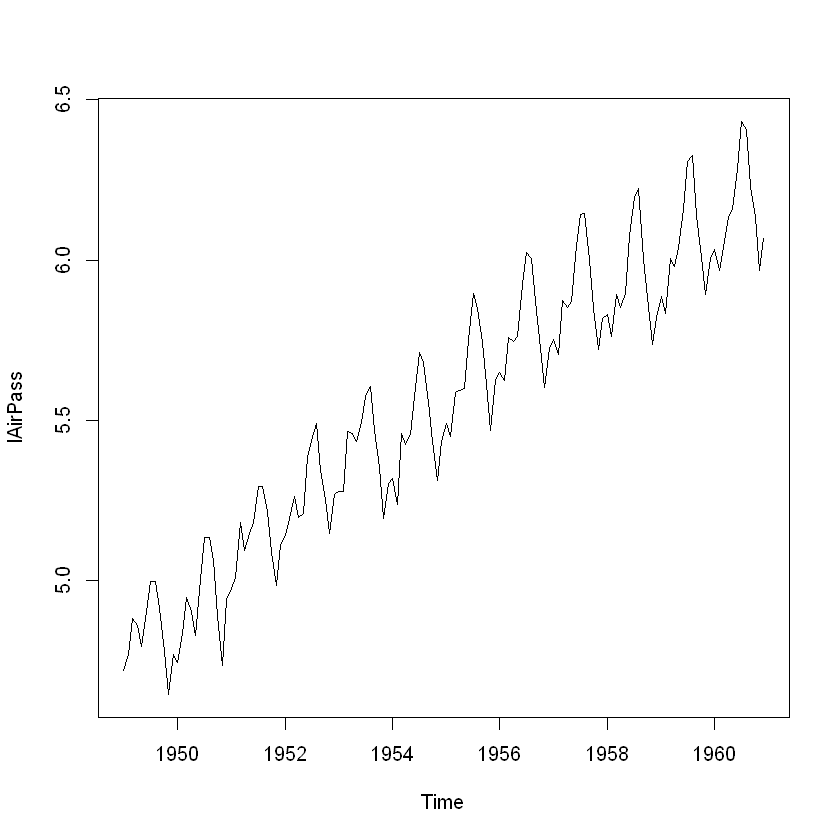

In [103]:
plot(lAirPass)

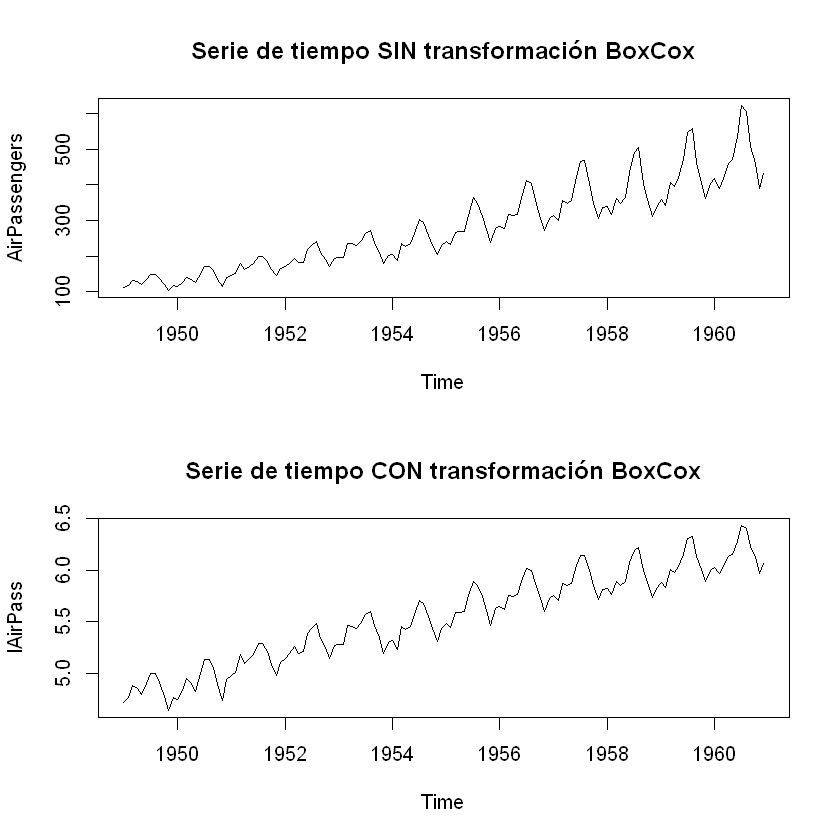

In [104]:
par(mfrow=c(2,1))
plot(AirPassengers, main="Serie de tiempo SIN transformación BoxCox")
plot(lAirPass, main="Serie de tiempo CON transformación BoxCox")

---

In [105]:
#####Prueba de Dickey Fuller######
library(fUnitRoots)
tseries::adf.test(lAirPass,k=10)
adfTest(lAirPass,lags = 12,type='nc')   ###Hay la presencia de Raíz Unitaria


	Augmented Dickey-Fuller Test

data:  lAirPass
Dickey-Fuller = -1.3232, Lag order = 10, p-value = 0.8582
alternative hypothesis: stationary


Warning message in adfTest(lAirPass, lags = 12, type = "nc"):
"p-value greater than printed p-value"


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 12
  STATISTIC:
    Dickey-Fuller: 3.7872
  P VALUE:
    0.99 

Description:
 Sun Feb 23 21:47:18 2020 by user: YULY


Según la prueba de **Dickey-Fuller**  hay la presencia de Raíz Unitaria.

In [106]:
library(urca)  #para usar la función ur.df (Realiza la prueba de raíz unitaria Dickey-Fuller aumentada.)
summary(ur.df(lAirPass, lags = 12))
adfTest(lAirPass,lags=12,type='ct')  ####Puede también indicar la presencia de una tendencia determinística.


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.103864 -0.023652 -0.001455  0.022160  0.126649 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1       0.005439   0.001436   3.787 0.000241 ***
z.diff.lag1  -0.198813   0.072080  -2.758 0.006737 ** 
z.diff.lag2  -0.273730   0.073309  -3.734 0.000292 ***
z.diff.lag3  -0.233607   0.072258  -3.233 0.001589 ** 
z.diff.lag4  -0.293133   0.073926  -3.965 0.000126 ***
z.diff.lag5  -0.206562   0.072058  -2.867 0.004915 ** 
z.diff.lag6  -0.266919   0.071493  -3.734 0.000292 ***
z.diff.lag7  -0.234526   0.071847  -3.264 0.001436 ** 
z.diff.lag8  -0.327393   0.073197  -4.473 1.79e-05 ***
z.diff.lag9  -0.198455   0.073623  -2.696 0.008054 ** 
z.diff.lag10 -0.279931   0.072710  -3.8


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 12
  STATISTIC:
    Dickey-Fuller: -1.5325
  P VALUE:
    0.7711 

Description:
 Sun Feb 23 21:47:18 2020 by user: YULY


# Tres tipos de descomposición

**1)**

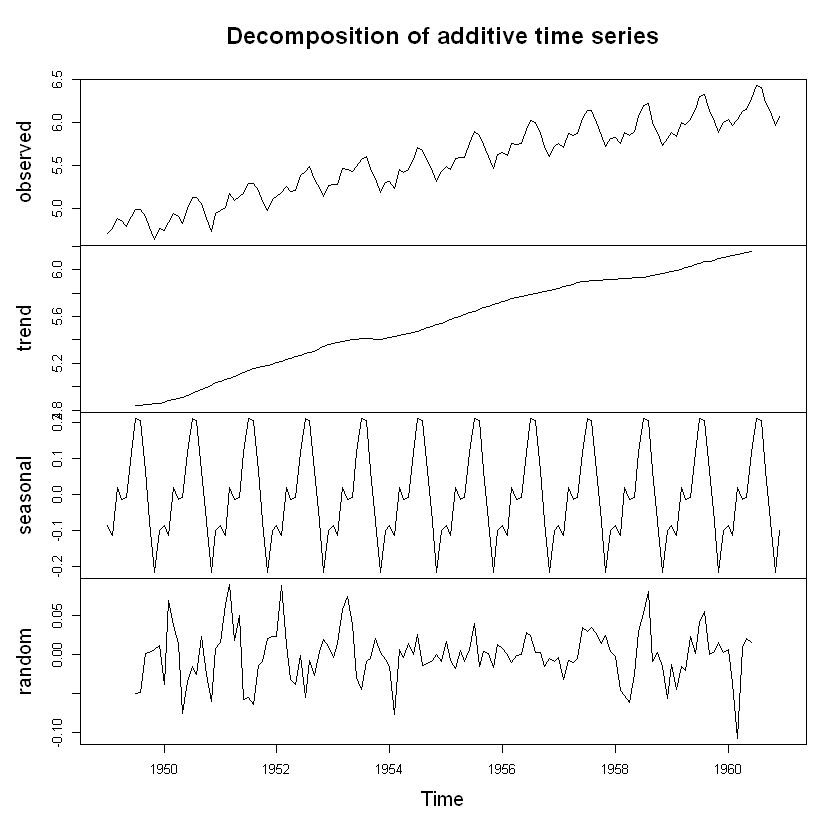

In [107]:
######Descomposición usando promedios Móviles
deslAirPass=decompose(lAirPass)
plot(deslAirPass)


In [108]:
deslAirPass

$x
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1949 4.718499 4.770685 4.882802 4.859812 4.795791 4.905275 4.997212 4.997212
1950 4.744932 4.836282 4.948760 4.905275 4.828314 5.003946 5.135798 5.135798
1951 4.976734 5.010635 5.181784 5.093750 5.147494 5.181784 5.293305 5.293305
1952 5.141664 5.192957 5.262690 5.198497 5.209486 5.384495 5.438079 5.488938
1953 5.278115 5.278115 5.463832 5.459586 5.433722 5.493061 5.575949 5.605802
1954 5.318120 5.236442 5.459586 5.424950 5.455321 5.575949 5.710427 5.680173
1955 5.488938 5.451038 5.587249 5.594711 5.598422 5.752573 5.897154 5.849325
1956 5.648974 5.624018 5.758902 5.746203 5.762051 5.924256 6.023448 6.003887
1957 5.752573 5.707110 5.874931 5.852202 5.872118 6.045005 6.142037 6.146329
1958 5.828946 5.762051 5.891644 5.852202 5.894403 6.075346 6.196444 6.224558
1959 5.886104 5.834811 6.006353 5.981414 6.040255 6.156979 6.306275 6.326149
1960 6.033086 5.968708 6.037871 6.133398 6.156979 6.282267 6.432940 6.406

**2)**

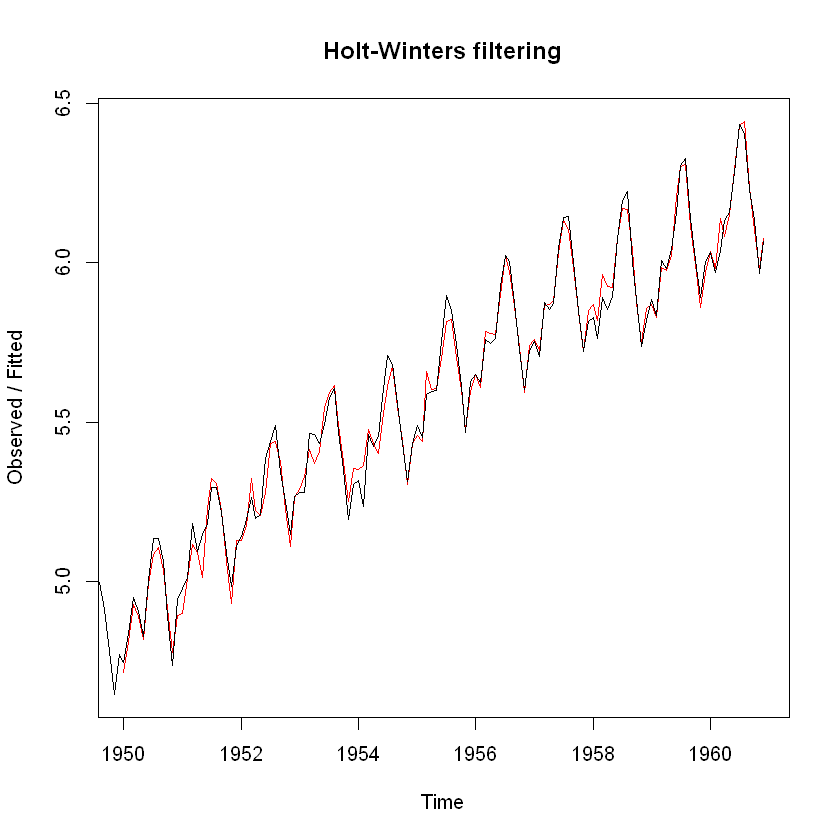

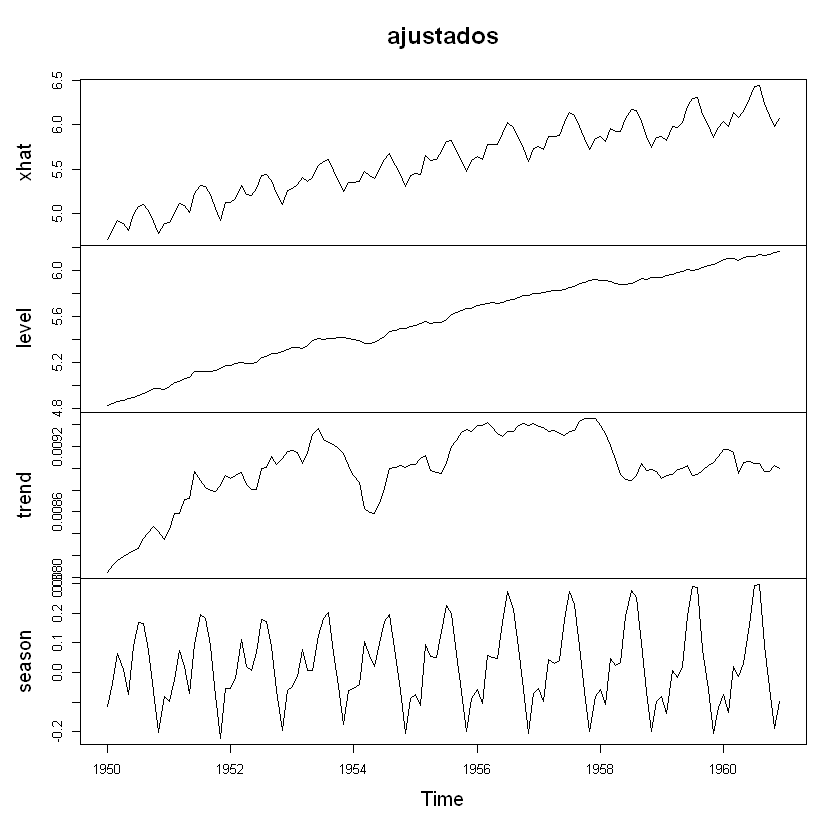

In [109]:
####Descompoisición usando suavizamiento exponencial
HWAP=HoltWinters(lAirPass,seasonal="additive")
plot(HWAP)
ajustados=fitted(HWAP)
plot(ajustados)


In [110]:
head(ajustados, n=14)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,xhat,level,trend,season
Jan 1950,4.712792,4.820716,0.008044413,-0.115968777
Feb 1950,4.811194,4.839258,0.008104710,-0.036167846
Mar 1950,4.927996,4.855556,0.008151775,0.064288208
Apr 1950,4.888601,4.870489,0.008190730,0.009921188
May 1950,4.816848,4.884126,0.008222010,-0.075499569
Jun 1950,4.993520,4.896092,0.008243520,0.089184444
Jul 1950,5.084876,4.907741,0.008263080,0.168871539
Aug 1950,5.106031,4.932636,0.008358613,0.165036933
Sep 1950,5.034129,4.950716,0.008414458,0.074998077
Oct 1950,4.913720,4.968428,0.008467862,-0.063175830


**3)**  **Descomposición basada en diferenciación**

$$X_t = M_t +  S_t + Y_t$$

Para el proceso estocastico deterimnado por la producción de azucar  ${X_t}$  no estacionario, existen diversas estrategias para convertirlo en un proceso  ${Y_t}$  estacionario, se propone desarrollar el método de descomposición basado en diferenciación el cual consiste en transformar los datos  ${X_t}$  eliminando las componentes  $M_t$  y  $S_t$ , aquí llamaremos a  $M_t$  el componente de tendencia, a  $S_t$  la componente estacional, la filosofia consiste en transformar los datos de tal manera que se eliminen los componentes y de esta manera convertir al proceso  ${X_t}$  que es no estacionario en  $Y_t$  el cual es estacionario.

En este orden de ideas, se propone una diferenciación ordinaria para la serie para quitar la tendencia:

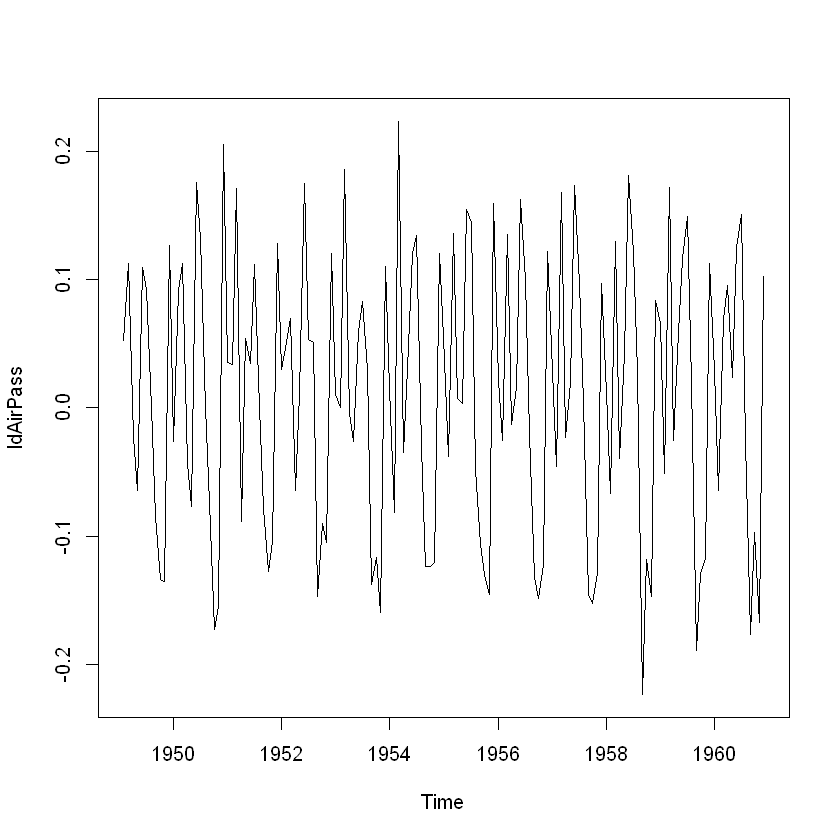

In [111]:
####DiferenciaciÃ³n
ldAirPass=diff(lAirPass,lag=1,differences = 1)###Differences indica número de diferencia
plot(ldAirPass)

In [112]:
adfTest(ldAirPass,lags = 2,type='nc')  ###No se debe diferenciar más###

Warning message in adfTest(ldAirPass, lags = 2, type = "nc"):
"p-value smaller than printed p-value"


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -7.6337
  P VALUE:
    0.01 

Description:
 Sun Feb 23 21:47:19 2020 by user: YULY


Identifiquemos el monthplot de la serie diferenciada, la cual evidencia que todavía se hace necesario modificar la serie.

[1] 1

[1] 1

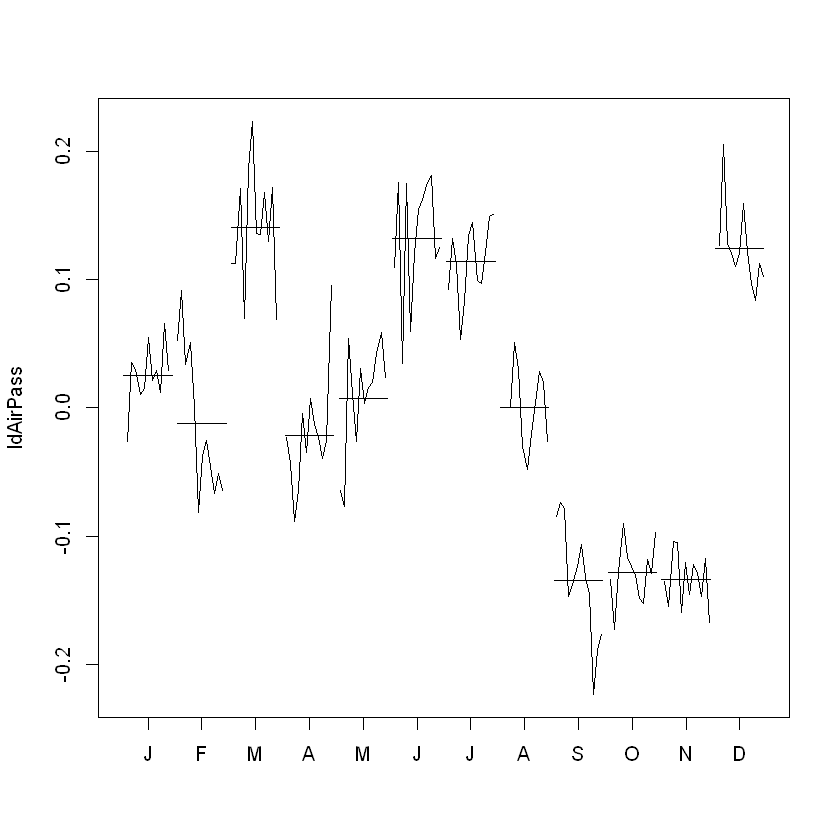

In [113]:
monthplot(ldAirPass)
nsdiffs(AirPassengers)
nsdiffs(ldAirPass)

En la función **nsdiffs** se indica o estima el número de diferencias estacionales necesarias (que se deberian realizar). En este caso 1

### Nueva diferenciación

In [114]:
DdlAirpassengers=diff(ldAirPass,lag=12)

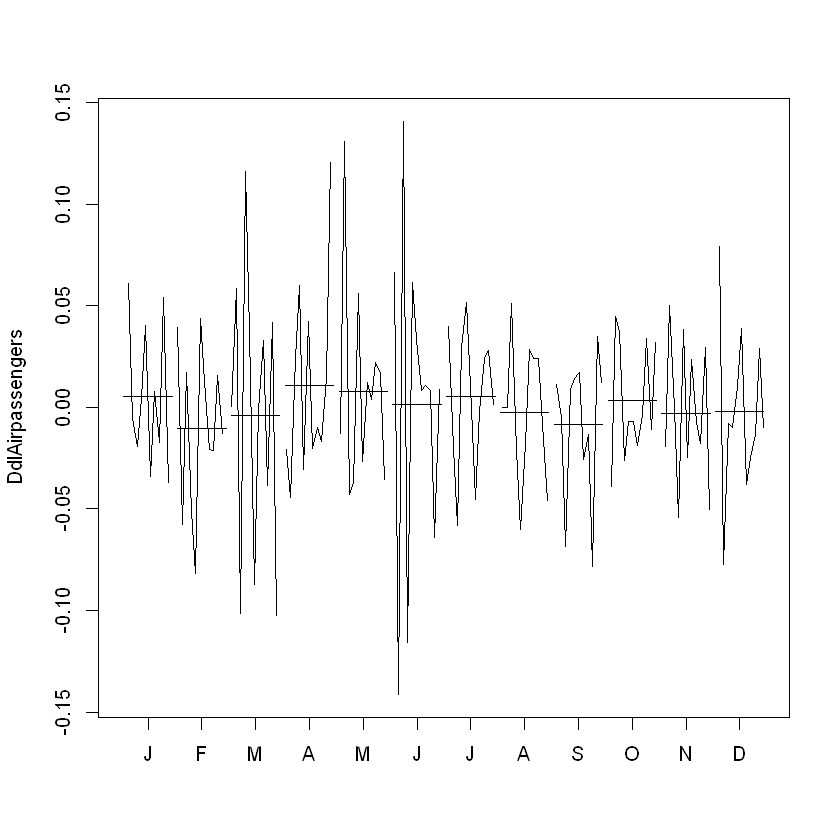

In [115]:
monthplot(DdlAirpassengers)
#El monthplot traza subseries estacionales (u otras) de una serie de tiempo. Para cada temporada (u otra categoría),
#se traza una serie temporal.

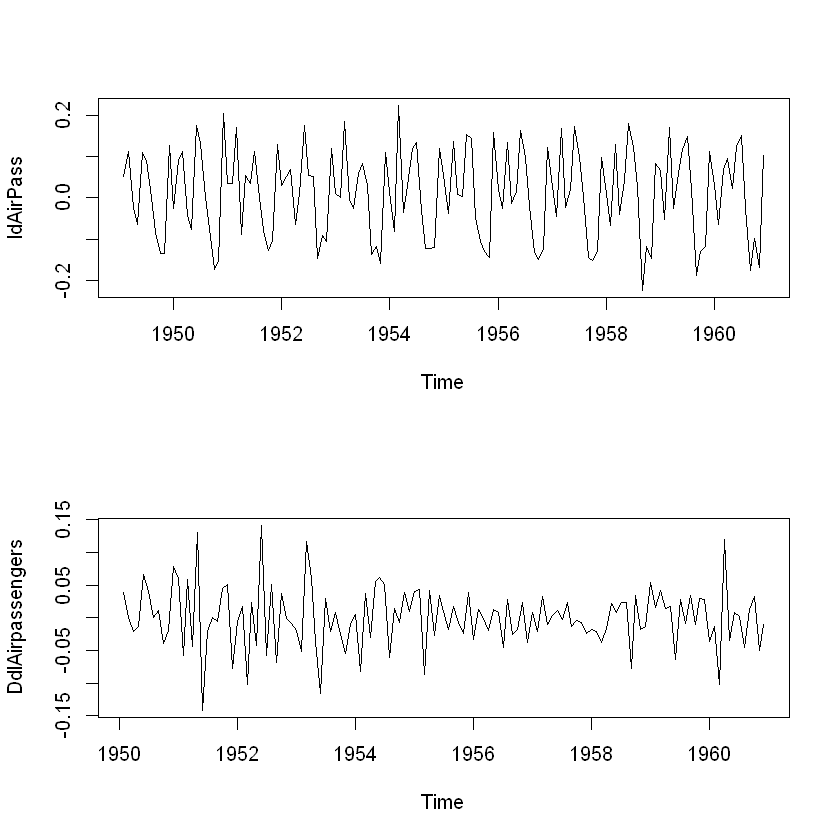

In [116]:
par(mfrow=c(2,1))
plot(ldAirPass)
plot(DdlAirpassengers)

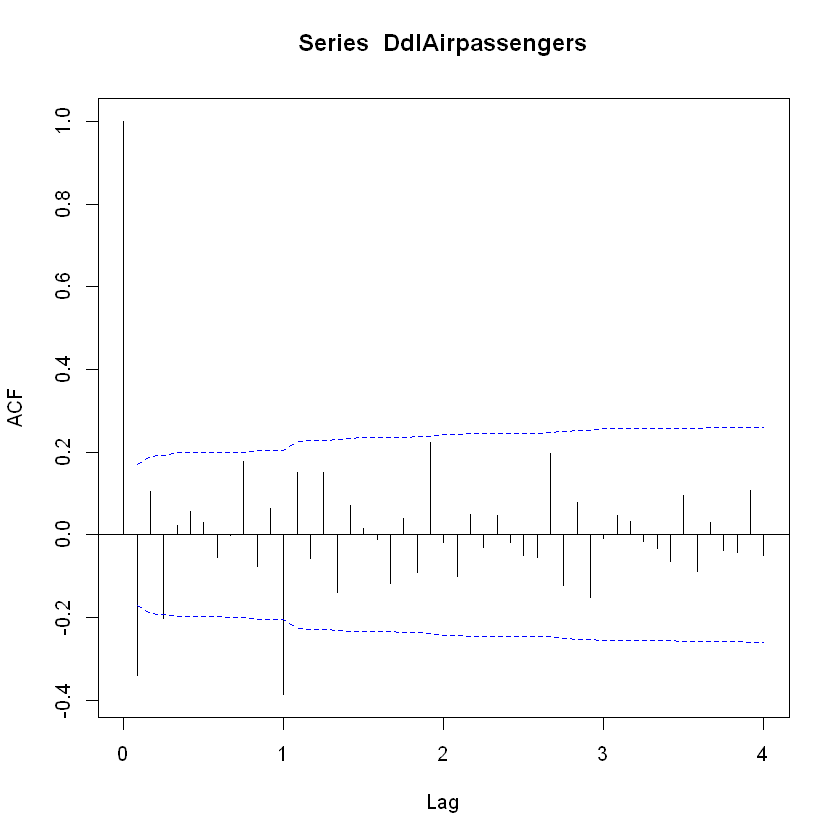

In [117]:
##Autocorrelogramas
acf(DdlAirpassengers,lag.max = 48, ci.type='ma')    #para colocar las bandas de confianza

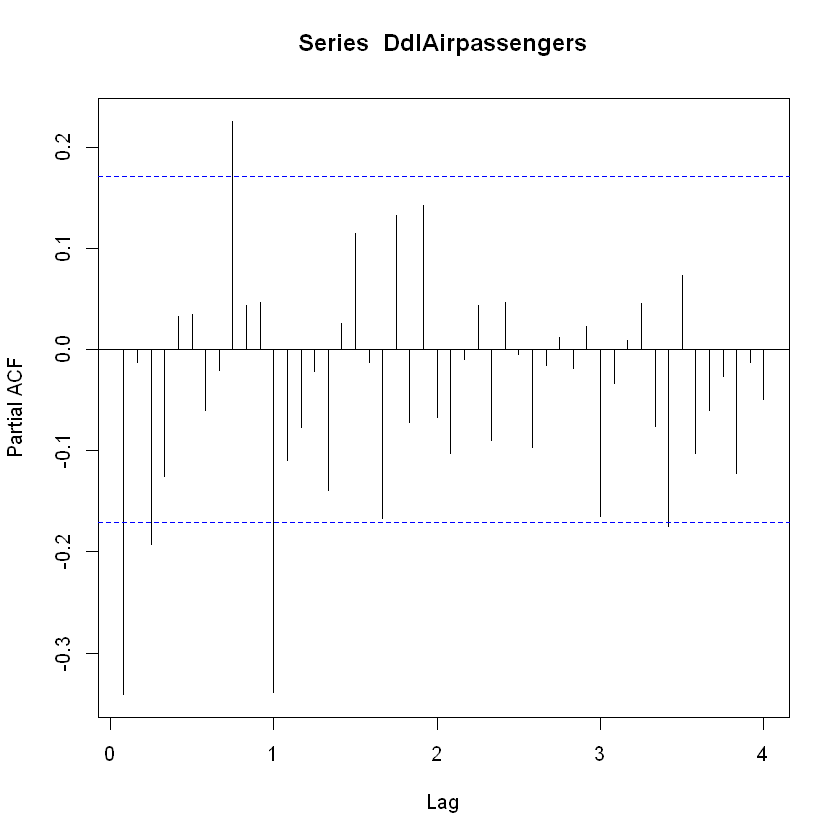

In [118]:
pacf(DdlAirpassengers,lag.max = 48)

A continuación se genera un modelo **MA(1) estacional** y **AR(1) estacional** (ha de tomarse la serie natural)

In [125]:
library(lmtest)
##Ajuste del modelo

#Modelo MA(1) estacional
modelo = Arima(AirPassengers, c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 12),lambda = 0)
coeftest(modelo); AIC(modelo)

#Modelo AR(1) estacional
modeloalter= Arima(AirPassengers, c(2, 1, 0),seasonal = list(order = c(1, 1, 0), period = 12),lambda = 0)
coeftest(modeloalter);AIC(modeloalter)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ma1  -0.401828   0.089644 -4.4825 7.378e-06 ***
sma1 -0.556945   0.073100 -7.6190 2.557e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] -483.3991


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ar1  -0.405690   0.087605 -4.6309 3.641e-06 ***
ar2  -0.079907   0.087551 -0.9127    0.3614    
sar1 -0.472341   0.080592 -5.8609 4.604e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] -473.6493

# Diagnóstico

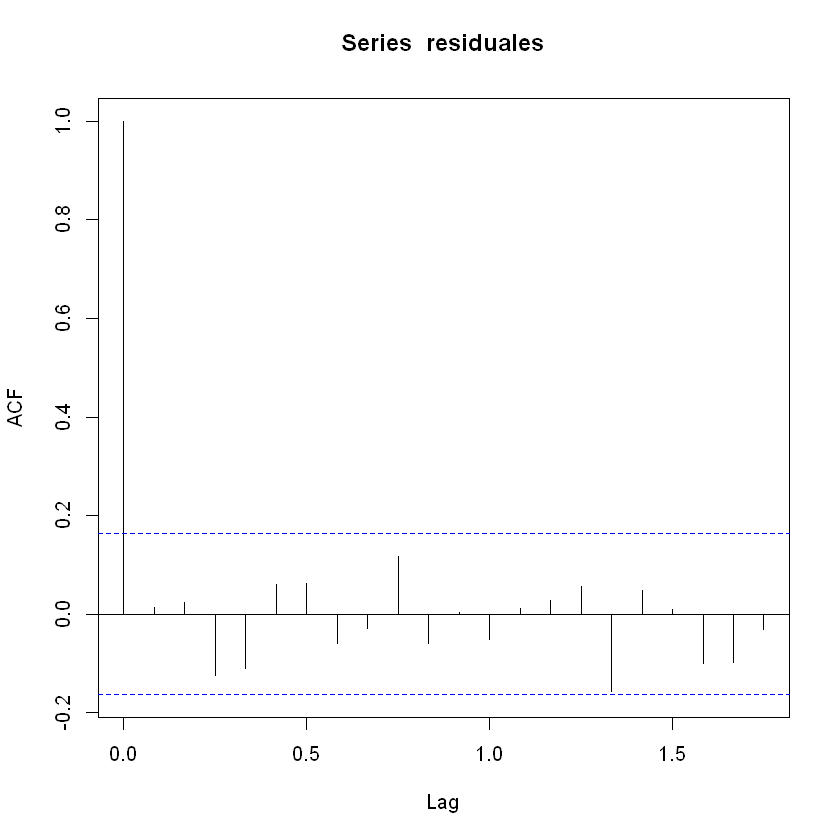

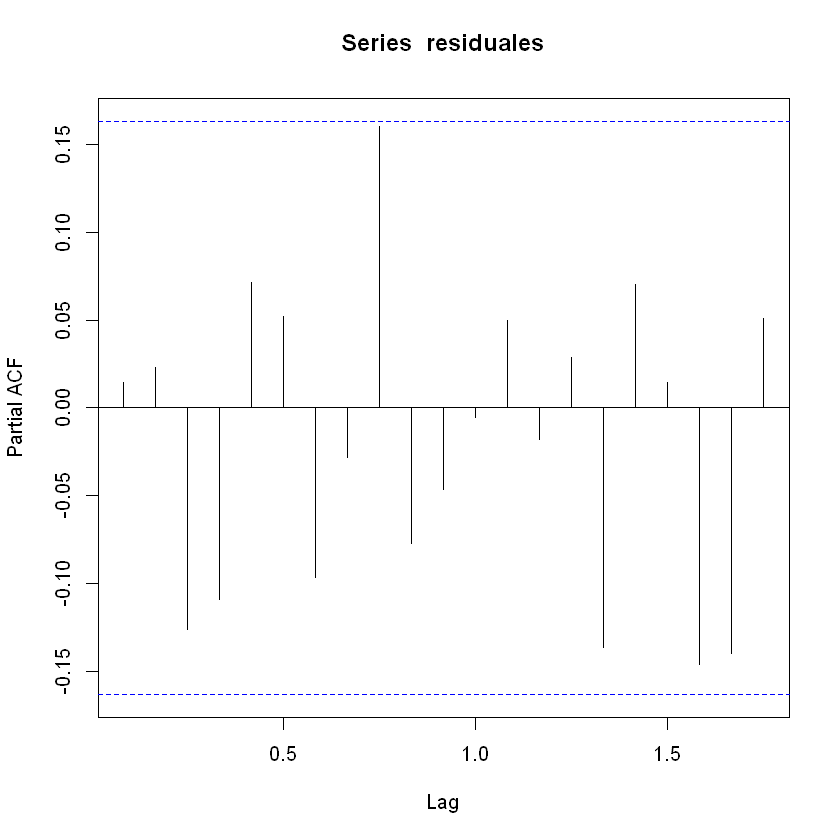

In [128]:
## AnÃ¡lisis de residuales
residuales <- modelo$residuals
acf(residuales)
pacf(residuales)


In [135]:
######AnÃ¡lisis de Outliers
#Test de normalidad
library(tseries)
jarque.bera.test(residuales)
#Test de autocorrelación
Box.test(residuales, lag = (length(residuales)/4), type = "Ljung-Box", fitdf = 2)


	Jarque Bera Test

data:  residuales
X-squared = 5.2265, df = 2, p-value = 0.0733



	Box-Ljung test

data:  residuales
X-squared = 37.874, df = 34, p-value = 0.2969


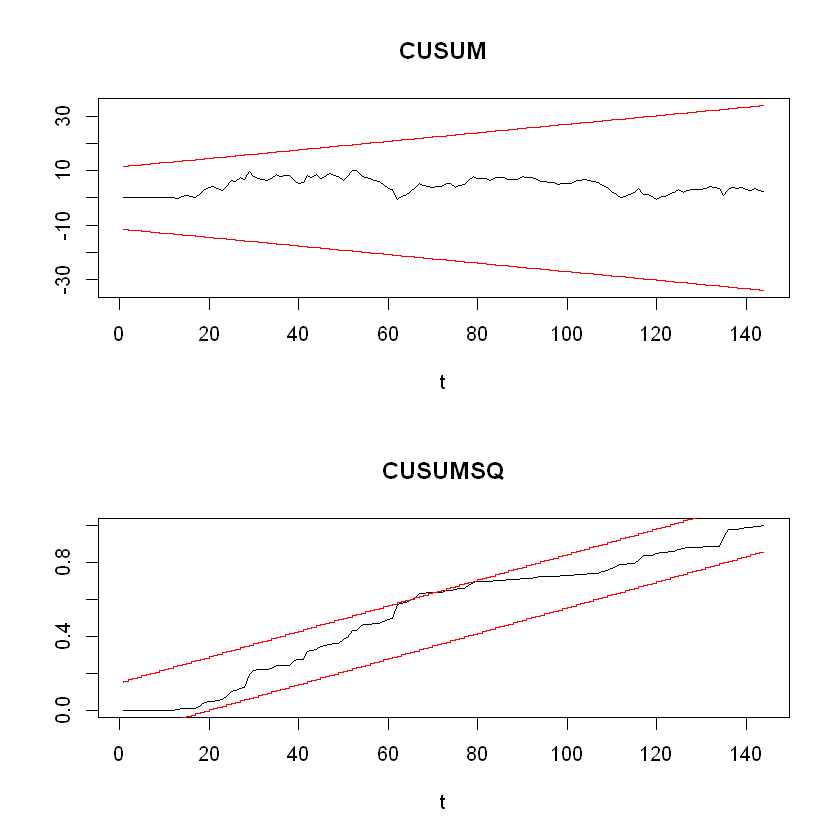

In [91]:
###Estad?ticas CUSUM
res=residuales
cum=cumsum(res)/sd(res)
N=length(res)
cumq=cumsum(res^2)/sum(res^2)
Af=0.948 ###Cuantil del 95% para la estad?stica cusum
co=0.14422####Valor del cuantil aproximado para cusumsq para n/2
LS=Af*sqrt(N)+2*Af*c(1:length(res))/sqrt(N)
LI=-LS
LQS=co+(1:length(res))/N
LQI=-co+(1:length(res))/N
par(mfrow=c(2,1))
plot(cum,type="l",ylim=c(min(LI),max(LS)),xlab="t",ylab="",main="CUSUM")
lines(LS,type="S",col="red")
lines(LI,type="S",col="red")
#CUSUM Square
plot(cumq,type="l",xlab="t",ylab="",main="CUSUMSQ")                      
lines(LQS,type="S",col="red")                                                                           
lines(LQI,type="S",col="red")

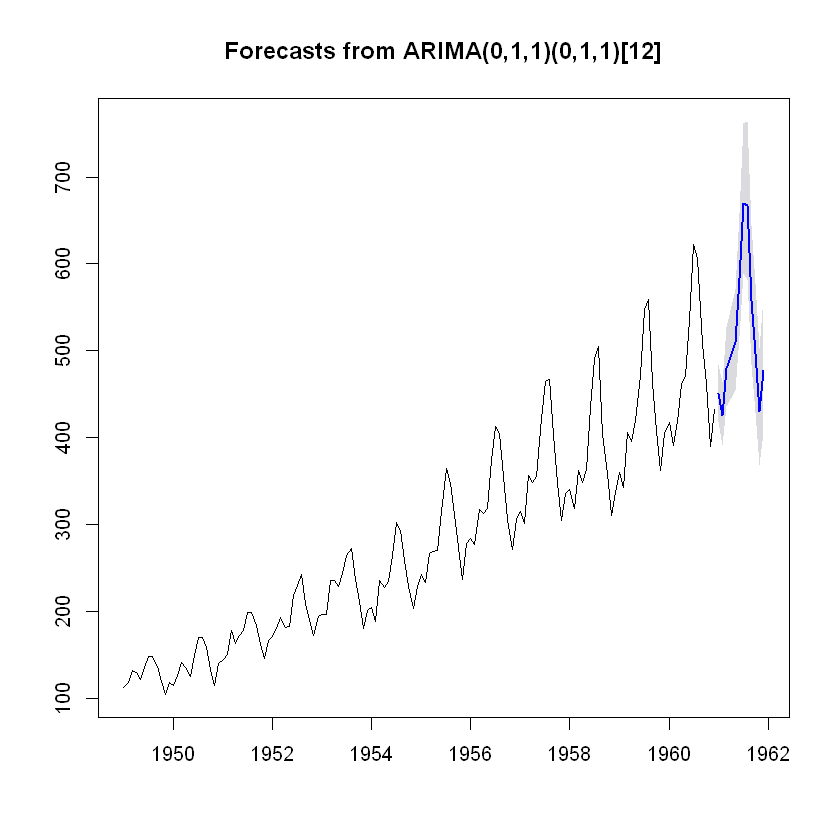

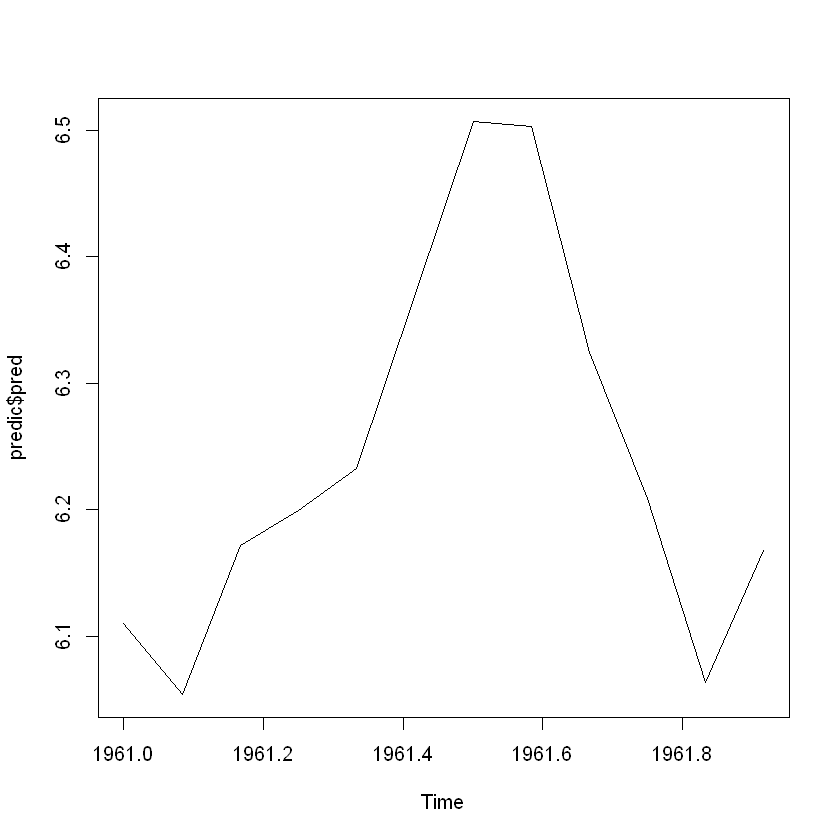

In [136]:
##Pron?sticos
Pronosticos=forecast(modelo,h=12,level=0.95)
plot(Pronosticos)
predic<-predict(modelo,n.ahead=12)
plot(predic$pred)

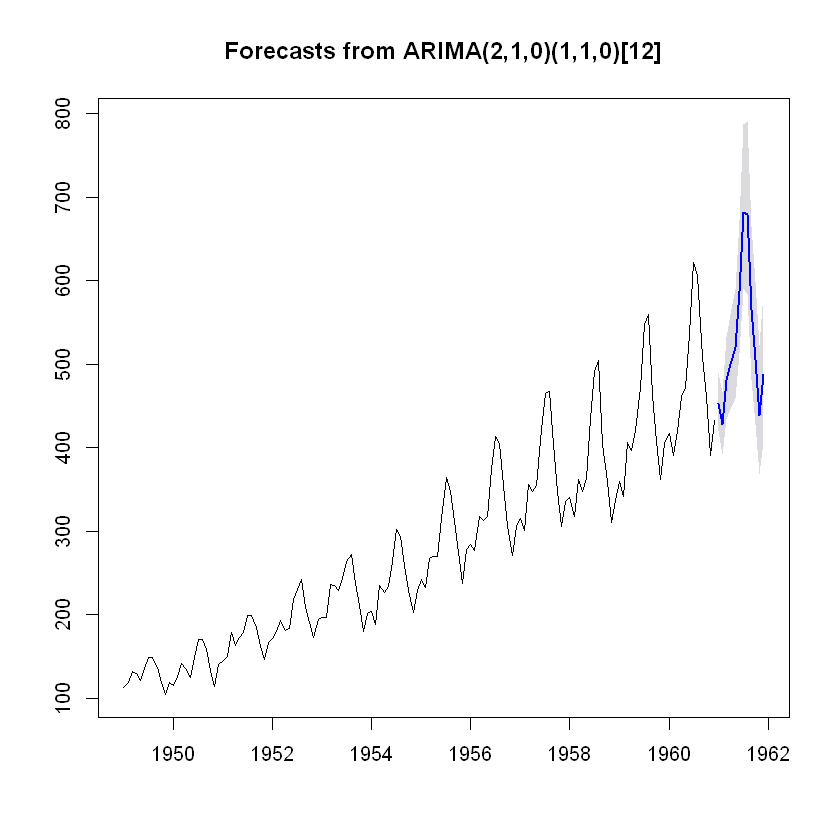

In [137]:
Pronosticos=forecast(modeloalter,h=12,level=0.95)
plot(Pronosticos)

In [94]:
Pronosticos

         Point Forecast    Lo 95    Hi 95
Jan 1961       451.8916 419.0542 487.3023
Feb 1961       426.4961 390.1836 466.1881
Mar 1961       479.1762 430.9424 532.8085
Apr 1961       498.5957 442.6753 561.5802
May 1961       518.8959 455.1023 591.6318
Jun 1961       585.8297 508.2057 675.3100
Jul 1961       680.6583 584.4480 792.7064
Aug 1961       677.4281 576.1309 796.5358
Sep 1961       564.7191 475.9485 670.0465
Oct 1961       504.9623 421.9445 604.3139
Nov 1961       437.2294 362.3636 527.5628
Dec 1961       486.5588 400.0909 591.7142

# NOTA

Para poder instalar paquetes en jupyter, uso la siguiente linea.

* install.packages("glmx", "/Users/YULY/anaconda/Lib/R/library")